In [86]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df_kotor = pd.read_excel("redacted")
df_kotor.head()

,Unnamed: 0,review_id,review_text,review_rating,review_datetime_utc,review_likes,sentiment
0,0,ChZDSUhNMG9nS0VJQ0FnSUM4MnFXUlp3EAE,"""must see"" spot, the view is just breathtaking...",5,44015.421157,0,Positive
1,1,ChZDSUhNMG9nS0VJQ0FnSUM2clBQaGJBEAE,-Attention ! Don't make the mistake of giving ...,3,44439.762789,1,Negative
2,2,ChZDSUhNMG9nS0VJQ0FnSURVejhyLVNREAE,..and when you think that it has been hard dug...,5,43716.615509,3,Positive
3,3,ChZDSUhNMG9nS0VJQ0FnSUMwNHM3MUFnEAE,/! \ /! \ More access possible by the outside ...,3,43728.446574,1,Negative
4,4,ChZDSUhNMG9nS0VJQ0FnSURrdllxaUF3EAE,+ 37 Â° C in the mountain ........ But the vie...,5,43651.407384,0,Positive


In [88]:
df_kotor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1768 entries, 0 to 1767
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1768 non-null   int64  
 1   review_id            1768 non-null   object 
 2   review_text          1768 non-null   object 
 3   review_rating        1768 non-null   int64  
 4   review_datetime_utc  1768 non-null   float64
 5   review_likes         1768 non-null   int64  
 6   sentiment            1768 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 96.8+ KB


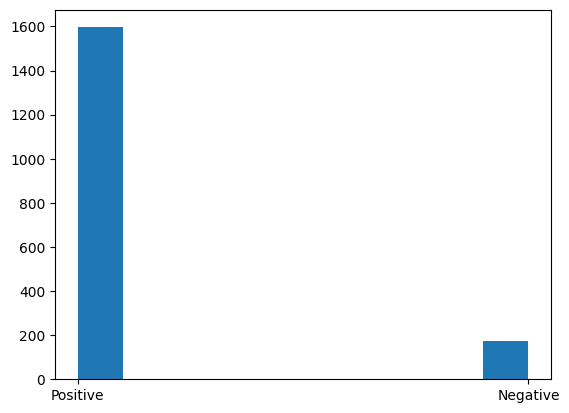

In [89]:
plt.hist(df_kotor["sentiment"])
plt.show()

In [ ]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis", return_all_scores=True)

In [91]:
from sklearn.metrics import classification_report

df_kotor['review_text'] = df_kotor['review_text'].str.slice(0, 512)
results = classifier([x.lower() for x in df_kotor['review_text'].tolist()])
print(results)

[[{'label': 'NEGATIVE', 'score': 0.00014562575961463153}, {'label': 'POSITIVE', 'score': 0.999854326248169}], [{'label': 'NEGATIVE', 'score': 0.9695075750350952}, {'label': 'POSITIVE', 'score': 0.030492421239614487}], [{'label': 'NEGATIVE', 'score': 0.9977217316627502}, {'label': 'POSITIVE', 'score': 0.0022782159503549337}], [{'label': 'NEGATIVE', 'score': 0.9992592930793762}, {'label': 'POSITIVE', 'score': 0.0007406898075714707}], [{'label': 'NEGATIVE', 'score': 0.0001661426795180887}, {'label': 'POSITIVE', 'score': 0.9998338222503662}], [{'label': 'NEGATIVE', 'score': 0.0003365020966157317}, {'label': 'POSITIVE', 'score': 0.9996634721755981}], [{'label': 'NEGATIVE', 'score': 0.9948444366455078}, {'label': 'POSITIVE', 'score': 0.005155534949153662}], [{'label': 'NEGATIVE', 'score': 0.000153584944200702}, {'label': 'POSITIVE', 'score': 0.999846339225769}], [{'label': 'NEGATIVE', 'score': 0.00020110847253818065}, {'label': 'POSITIVE', 'score': 0.9997989535331726}], [{'label': 'NEGATIVE'

In [92]:
predicted_labels = []
for prediction in results:
    best = max(prediction, key=lambda x: x['score'])
    predicted_labels.append("Positive" if best['label'] == "POSITIVE" else "Negative") 
    
set(predicted_labels)

{'Negative', 'Positive'}

In [93]:
print(classification_report(df_kotor['sentiment'], predicted_labels))

              precision    recall  f1-score   support

    Negative       0.52      0.83      0.64       172
    Positive       0.98      0.92      0.95      1596

    accuracy                           0.91      1768
   macro avg       0.75      0.87      0.79      1768
weighted avg       0.94      0.91      0.92      1768



In [94]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(df_kotor['sentiment'], predicted_labels, labels=['Negative', 'Positive'])
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[ 142   30]
 [ 129 1467]]


In [ ]:
df_results = pd.DataFrame({
    "text": df_kotor["review_text"],
    "true": df_kotor["sentiment"],
    "predicted": predicted_labels
})

wrong_predictions = df_results[df_results["true"] != df_results["predicted"]]
print(wrong_predictions)

                                                   text      true predicted
2     ..and when you think that it has been hard dug...  Positive  Negative
18    8 â‚¬ to access are unjustifiable; as soon as ...  Negative  Positive
29    A beautiful place, the climb is certainly heav...  Positive  Negative
75    A place worth visiting. When you leave the hea...  Positive  Negative
77    A poorly maintained fort with a beautiful view...  Negative  Positive
82    A small challenge, but no crowds like in the o...  Positive  Negative
91    A very cool view and climbing is like conqueri...  Positive  Negative
137   An unusual city with an amazing fortress. In s...  Positive  Negative
149                  Autumn old fortress 2000 years old  Positive  Negative
200   Beautiful views and an unfortunately very negl...  Negative  Positive
203   Beautiful views, the climb costs 8 euros. The ...  Positive  Negative
207   Beautiful visit of the city, the climb is appr...  Positive  Negative
237   Climbe

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline

model_name = "google/flan-t5-large"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
nlp = pipeline("text2text-generation", model=model, tokenizer=tokenizer)

text = "I love this product! It works perfectly and exceeded my expectations."
prompt = f"Classify the sentiment of this sentence (Positive/Negative): {text}"
result = nlp(prompt, max_length=50, do_sample=False)
print("Sentiment:", result[0]['generated_text'])

Device set to use cpu


Sentiment: Positive


In [97]:
df_kotor['review_text'] = df_kotor['review_text'].str.slice(0, 512)
results = [nlp(f"Classify the sentiment of this sentence (Positive/Negative): {x}") for x in df_kotor['review_text'].tolist()]
print(results)

[[{'generated_text': 'Positive'}], [{'generated_text': 'Negative'}], [{'generated_text': 'Negative'}], [{'generated_text': 'Negative'}], [{'generated_text': 'Positive'}], [{'generated_text': 'Positive'}], [{'generated_text': 'Negative'}], [{'generated_text': 'Positive'}], [{'generated_text': 'Positive'}], [{'generated_text': 'Positive'}], [{'generated_text': 'Positive'}], [{'generated_text': 'Positive'}], [{'generated_text': 'Positive'}], [{'generated_text': 'Negative'}], [{'generated_text': 'Positive'}], [{'generated_text': 'Positive'}], [{'generated_text': 'Positive'}], [{'generated_text': 'Negative'}], [{'generated_text': 'Positive'}], [{'generated_text': 'Positive'}], [{'generated_text': 'Negative'}], [{'generated_text': 'Positive'}], [{'generated_text': 'Positive'}], [{'generated_text': 'Positive'}], [{'generated_text': 'Positive'}], [{'generated_text': 'Positive'}], [{'generated_text': 'Positive'}], [{'generated_text': 'Positive'}], [{'generated_text': 'Positive'}], [{'generated_

In [98]:
res = [x[0]['generated_text'] for x in results]
res

['Positive',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',

In [99]:
print(classification_report(df_kotor['sentiment'], res))

              precision    recall  f1-score   support

    Negative       0.68      0.90      0.77       172
    Positive       0.99      0.95      0.97      1596

    accuracy                           0.95      1768
   macro avg       0.83      0.93      0.87      1768
weighted avg       0.96      0.95      0.95      1768



In [100]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(df_kotor['sentiment'], res, labels=['Negative', 'Positive'])
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[ 155   17]
 [  74 1522]]


In [ ]:
df_results = pd.DataFrame({
    "text": df_kotor["review_text"],
    "true": df_kotor["sentiment"],
    "predicted": res
})
wrong_predictions = df_results[df_results["true"] != df_results["predicted"]]
print(wrong_predictions)

                                                   text      true predicted
2     ..and when you think that it has been hard dug...  Positive  Negative
13    1464 steps but to do absolutely Provide good s...  Positive  Negative
18    8 â‚¬ to access are unjustifiable; as soon as ...  Negative  Positive
29    A beautiful place, the climb is certainly heav...  Positive  Negative
34    A bit tiring until you get there but you might...  Negative  Positive
71    A picturesque town embedded in fortifications....  Positive  Negative
82    A small challenge, but no crowds like in the o...  Positive  Negative
106   Allow 45 min (without great physical condition...  Positive  Negative
111   Although it's free to go up there, it takes a ...  Positive  Negative
112   Although the effort to climb to the top of the...  Positive  Negative
130   An excellent view of the bay, but for the pass...  Positive  Negative
142                Approximately 40 minutes uphill hike  Positive  Negative
149         